In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data


An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

Features

age - Age of participant in years
physical_score - Score achieved during physical exam
Label/Target

test_result - 0 if no pass, 1 if test passed

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


# Exploratory Data Analysis and visualizations

In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [8]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot: xlabel='test_result', ylabel='count'>

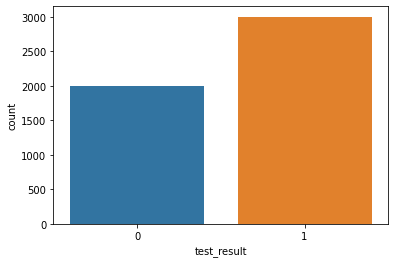

In [9]:
sns.countplot(data=df,x='test_result')

<AxesSubplot: xlabel='test_result', ylabel='age'>

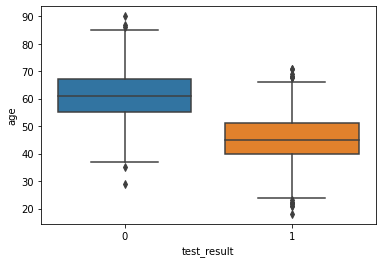

In [10]:
sns.boxplot(data=df,x='test_result',y='age')

<AxesSubplot: xlabel='age', ylabel='physical_score'>

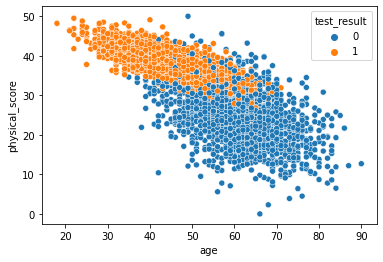

In [11]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

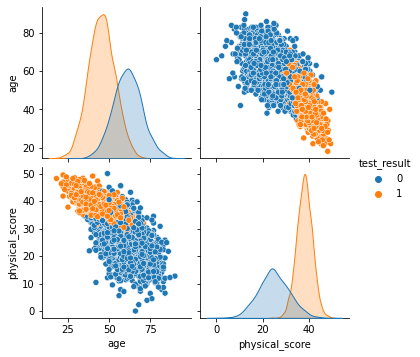

In [12]:
sns.pairplot(df,hue='test_result')

<AxesSubplot: >

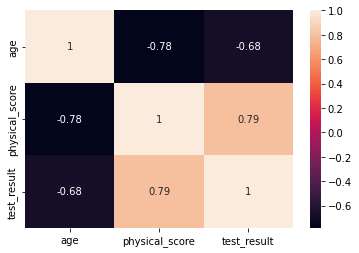

In [15]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: xlabel='age', ylabel='test_result'>

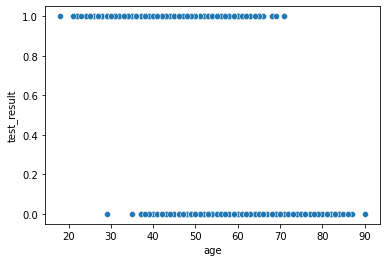

In [28]:
sns.scatterplot(x='age',y='test_result',data=df)

# Train Test Splitting and Scaling

In [19]:
X=df.drop('test_result',axis=1)
y=df['test_result']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [23]:
scaler=StandardScaler()


In [24]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_model=LogisticRegression()

In [27]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

# Model Perfomance 

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [32]:
y_pred=log_model.predict(scaled_X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.93

C:\Users\Abijith\anaconda3\envs\new_environment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


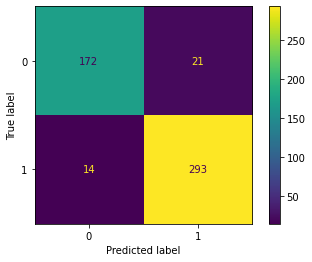

In [34]:
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(log_model,scaled_X_test,y_test)

# Evaluating Curves

In [35]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

C:\Users\Abijith\anaconda3\envs\new_environment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


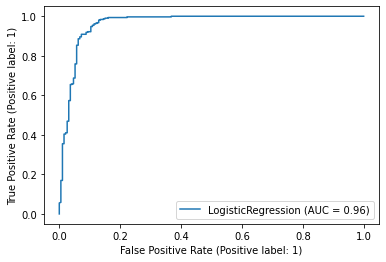

In [36]:
plot_roc_curve(log_model,scaled_X_test,y_test)